In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib as mpl
import scipy.stats as stats
import xarray as xr

from matplotlib.collections import LineCollection

import sys
sys.path.append("..")

from pivot import metric
from pivot.transform import PivotSpace
import pivot.plot as plotting
import pivot.generate as gen
from pivot.query import RangeQuery

%load_ext autoreload
%autoreload 2

In [2]:
def mask_forbidden(pivots):
    """Plot a gray area where the pivot space is inaccessible.

    This region does not have an preimage, as can easily be seen
    by using the triangle inequality, with both pivots being two
    points of the triangle.
    """
    def mask(*args, **kwargs):
        return plt.fill_between(*args,**kwargs,color="lightgrey", zorder=2)
    
    p_1, p_2 = points_to_pivot_space(pivots, pivots)
    b = p_2[0]
    m = -1
    inacc_below = lambda x: m*x+b

    x = np.linspace(-10,10)
    y = inacc_below(x)
    mask(x, y, y - 100)

    m = +1
    inacc_above = lambda x: m*x+b
    y = inacc_above(x)
    mask(x, y, y + 100)

    inacc_below = lambda x: m*x-b
    y = inacc_below(x)
    mask(x, y-100, y)

filter precition 0.0350140056022409


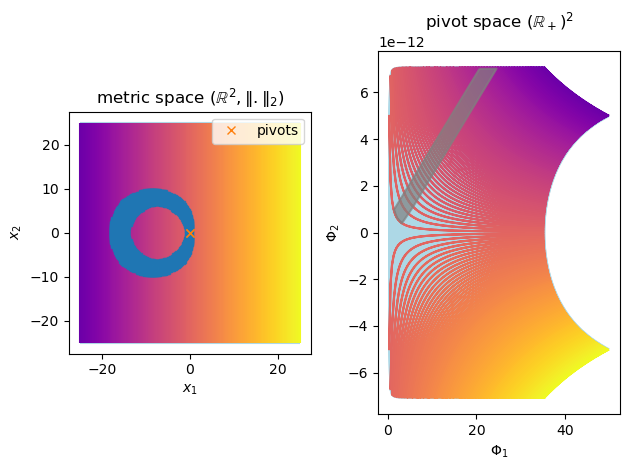

In [97]:
n = 200
piv_dist = 1e-11
grid_size = 50
query = -8

transform = PivotSpace(metric.Euclid(), pivots = np.asarray([[-piv_dist/2,0], [piv_dist/2,0]]))
query = RangeQuery(np.array([query, query]), 1, transform)

def trans(p):
    p_t = transform.transform_points(p)
    p_t = transform.rectify(p_t)
    
    return p_t

g = np.linspace(-grid_size/2,grid_size/2, n)
xx, yy = np.meshgrid(g,g)
points = np.array([xx.flatten(), yy.flatten()]).T

exact_candidates = query.get_candidates(points, "exact")
candidates = query.get_candidates(points, "ptolemy")

precision = len(exact_candidates) / len(candidates)
print("filter precition",precision)

p_t = trans(points)
xx_t, yy_t = p_t.T
xx_t = xx_t.reshape(xx.shape)
yy_t = yy_t.reshape(yy.shape)

cmap_1 = mpl.colormaps['plasma']
config = dict(
    ycolor = cmap_1(np.linspace(0.2,1, xx.shape[0])),
    xcolor = "lightblue",
)

plt.subplot(1,2,1)
plt.title(r"metric space $(\mathbb{R}^2, "+transform.metric.name+")$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plotting.plot_grid(xx,yy, **config)
plotting.plot_hull(exact_candidates, alpha=0.7)
plt.scatter(*candidates.T, marker=",", alpha=0.8, zorder=2)
#plotting.plot_hull(candidates, alpha=0.7)
#plt.plot(*query.center, "green")

plt.plot(*transform.pivots.T, "x", color="C1", label="pivots");
plt.legend()
plt.gca().set_aspect('equal')

plt.subplot(1,2,2)
plt.title("pivot space $(\mathbb{R}_+)^2$")
plt.xlabel("$\Phi_1$")
plt.ylabel("$\Phi_2$")

plotting.plot_grid(xx_t,yy_t, **config)

candidates_t = trans(candidates)
plotting.plot_hull(candidates_t, alpha=0.7)

#plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()

In [ ]:
k